## [EMI MUSIC DATABASE]  “predicting if a listener will love a new song”
 		(how much listner give rating to a new song)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline 
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
df_words =pd.read_csv("words.csv", encoding='ISO-8859-1')





Populating the interactive namespace from numpy and matplotlib


In [8]:

# Combining into one dataset for cleanin
df_train.set_index("User",inplace=True)
df_all = pd.concat([df_train, 
                    df_test,df_words],axis=1, join='inner')

In [4]:
df_all

,Artist,Track,Rating,Time,Artist,Track,User,Time,Artist,User,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87
47994,40,179,9,17,15,33,11779,19,32,27393,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0,NaN,NaN
8575,9,23,58,7,21,60,21454,22,25,19929,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
45475,46,168,13,16,10,142,35945,12,3,4558,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
39508,11,153,42,15,21,47,19245,21,1,3808,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
11565,14,32,54,19,6,14,5623,7,35,29732,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1,NaN,NaN
27130,31,79,37,11,14,95,30164,23,20,17649,...,1.0,0.0,NaN,0.0,0.0,0.0,1.0,0,NaN,NaN
19623,21,48,69,21,46,168,44486,16,38,31893,...,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0,NaN,NaN
47505,2,174,28,17,22,133,33036,0,38,30890,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN
15290,12,34,12,8,40,176,50606,17,33,27433,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0,NaN,NaN
24151,28,73,70,22,46,167,43695,16,23,20952,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0,NaN,NaN


In [9]:
print(df_all.isnull().sum())


Artist                   0
Track                    0
Rating                   0
Time                     0
Artist                   0
Track                    0
User                     0
Time                     0
Artist                   0
User                     0
HEARD_OF                 0
OWN_ARTIST_MUSIC    140667
LIKE_ARTIST         141038
Uninspired          144110
Sophisticated       163083
Aggressive           25607
Edgy                     0
Sociable            163083
Laid back           163083
Wholesome           187947
Uplifting           163083
Intriguing          163083
Legendary           187947
Free                163083
Thoughtful               0
Outspoken           163083
Serious              25607
Good lyrics          25607
Unattractive         25607
Confident            25607
                     ...  
Genius              163083
Trendsetter              0
Noisy                25607
Upbeat                 743
Relatable           103709
Energetic                0
E

In [5]:
df_all.dropna(inplace=True)

In [6]:
df_all

,Artist,Track,Rating,Time,Artist,Track,User,Time,Artist,User,...,Unoriginal,Dated,Iconic,Unapproachable,Classic,Playful,Arrogant,Warm,Soulful,Unnamed: 87


In [45]:
df_all.head()

,Artist,Track,Rating,Time,Artist,Track,User,Time
47994,40,179,9,17,15,33,11779,19
8575,9,23,58,7,21,60,21454,22
45475,46,168,13,16,10,142,35945,12
39508,11,153,42,15,21,47,19245,21
11565,14,32,54,19,6,14,5623,7


In [37]:
df_all.shape[0]

314484

In [38]:
users=pd.read_csv("users.csv");

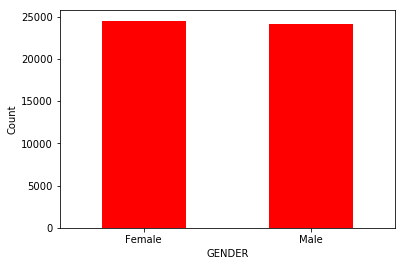

In [39]:
users.GENDER.value_counts(dropna=False).plot(kind='bar', color='red', rot=0)
plt.xlabel('GENDER')
plt.ylabel("Count")

##Number of male and female are equal who have given the ratings to the tracks

In [40]:
users.head()

,RESPID,GENDER,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,...,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19
0,36927,Female,60.0,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49.0,50.0,...,50.0,50.0,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0
1,3566,Female,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55.0,55.0,...,12.0,65.0,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0
2,20054,Female,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11.0,50.0,...,50.0,94.0,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0
3,41749,Female,40.0,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81.0,80.0,...,76.0,74.0,64.0,73.0,85.0,61.0,77.0,76.0,78.0,88.0
4,23108,Female,16.0,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76.0,79.0,...,56.0,13.0,82.0,79.0,68.0,71.0,NaN,86.0,80.0,32.0


In [42]:

#transformation
#Implementation of ONE HOT ENCODING.
##converting into binary values.
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:5] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

# One Hot Encoding
print("One Hot Encoding categorical data...")
columns_to_convert = ["GENDER"]

for column in columns_to_convert:
    users = convert_to_binary(df=users, column_to_convert=column)
    users.drop(column, axis=1, inplace=True)


One Hot Encoding categorical data...


KeyError: 'GENDER'

In [43]:
users.head()

,RESPID,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,GENDE_female,GENDE_male
0,36927,60.0,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49.0,50.0,49.0,...,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0,1,0
1,3566,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55.0,55.0,62.0,...,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0,1,0
2,20054,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11.0,50.0,9.0,...,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0,1,0
3,41749,40.0,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81.0,80.0,88.0,...,64.0,73.0,85.0,61.0,77.0,76.0,78.0,88.0,1,0
4,23108,16.0,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76.0,79.0,78.0,...,82.0,79.0,68.0,71.0,NaN,86.0,80.0,32.0,1,0


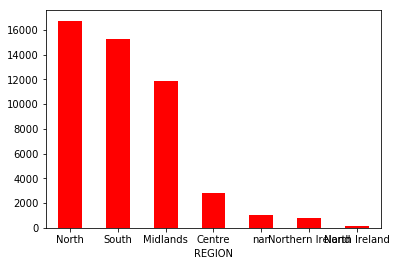

In [44]:
users.REGION.value_counts(dropna=False).plot(kind='bar', color='red', rot=0)
plt.xlabel('REGION')

##people in NORTH REGION HAS GIVEN MORE RESPONSE THROUGH RATINGS

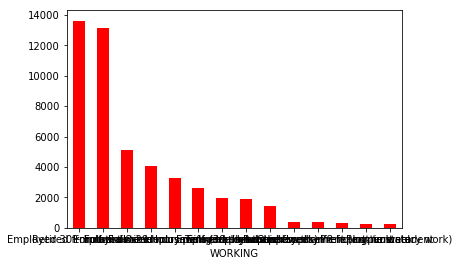

In [45]:
users.WORKING.value_counts(dropna=False).plot(kind='bar', color='red', rot=0)
plt.xlabel('WORKING')


#PEOPLE WHO ARE EMPLOYED 30+ HALF WEEK ARE MORE IN NUMBER

In [46]:

def remove_noise(df, column, min_val, max_val):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<=min_val, col_values>=max_val), np.NaN, col_values)
    return df

## Fixing age column 
print("Fixing age column...")
users= remove_noise(df = users, column = 'AGE', min_val = 0, max_val = 90)
users['AGE'].fillna(-1, inplace = True)
print("Fixing age column...completed")

Fixing age column...
Fixing age column...completed


/home/mahantesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less_equal
  after removing the cwd from sys.path.
/home/mahantesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


In [47]:
users.head(10)

,RESPID,AGE,WORKING,REGION,MUSIC,LIST_OWN,LIST_BACK,Q1,Q2,Q3,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,GENDE_female,GENDE_male
0,36927,60.0,Other,South,Music is important to me but not necessarily m...,1 hour,NaN,49.0,50.0,49.0,...,71.0,52.0,71.0,9.0,7.0,72.0,49.0,26.0,1,0
1,3566,36.0,Full-time housewife / househusband,South,Music is important to me but not necessarily m...,1 hour,1 hour,55.0,55.0,62.0,...,65.0,80.0,79.0,51.0,31.0,68.0,54.0,33.0,1,0
2,20054,52.0,Employed 30+ hours a week,Midlands,I like music but it does not feature heavily i...,1 hour,Less than an hour,11.0,50.0,9.0,...,51.0,74.0,66.0,27.0,46.0,73.0,8.0,31.0,1,0
3,41749,40.0,Employed 8-29 hours per week,South,Music means a lot to me and is a passion of mine,2 hours,3 hours,81.0,80.0,88.0,...,64.0,73.0,85.0,61.0,77.0,76.0,78.0,88.0,1,0
4,23108,16.0,Full-time student,North,Music means a lot to me and is a passion of mine,3 hours,6 hours,76.0,79.0,78.0,...,82.0,79.0,68.0,71.0,NaN,86.0,80.0,32.0,1,0
5,42754,20.0,Temporarily unemployed,Midlands,Music means a lot to me and is a passion of mine,5 hours,NaN,74.0,100.0,100.0,...,73.0,100.0,100.0,75.0,74.0,76.0,34.0,73.0,0,1
6,4596,58.0,Retired from full-time employment (30+ hours p...,North,I like music but it does not feature heavily i...,1 hour,2 hours,31.0,31.0,37.0,...,50.0,34.0,25.0,10.0,14.0,49.0,29.0,24.0,1,0
7,40555,50.0,Employed 30+ hours a week,Midlands,Music is important to me but not necessarily m...,1 hour,5 hours,50.0,32.0,51.0,...,67.0,64.0,71.0,7.0,27.0,72.0,52.0,31.0,1,0
8,8673,45.0,NaN,Centre,I like music but it does not feature heavily i...,NaN,3,9.0,46.0,11.0,...,49.0,13.0,11.0,13.0,8.0,48.0,NaN,NaN,1,0
9,5195,41.0,Employed 30+ hours a week,South,Music is important to me but not necessarily m...,7 hours,1 hour,10.0,17.0,17.0,...,81.0,7.0,62.0,12.0,10.0,6.0,8.0,7.0,0,1


In [ ]:
print("Determing primary device...")
sessions_device = df_sessions.loc[:, ['user_id', 'device_type', 'secs_elapsed']]
aggregated_lvl1 = sessions_device.groupby(['user_id', 'device_type'], as_index=False, sort=False).aggregate(np.sum)
#aggregated_lvl1.head(10)
idx = aggregated_lvl1.groupby(['user_id'], sort=False)['secs_elapsed'].transform(max) == aggregated_lvl1['secs_elapsed']
#idx.head(10)
df_sessions_primary = pd.DataFrame(aggregated_lvl1.loc[idx , ['user_id', 'device_type', 'secs_elapsed']])
#df_sessions_primary.head(10)
df_sessions_primary.rename(columns = {'device_type':'primary_device', 'secs_elapsed':'primary_secs'}, inplace=True)
#df_sessions_primary.head(10)
# Call user defined One Hot Encoding function
df_sessions_primary = convert_to_binary(df=df_sessions_primary, column_to_convert='primary_device')
#df_sessions_primary.head()
df_sessions_primary.drop('primary_device', axis=1, inplace=True)
#df_sessions_primary.head()
print("Determing primary device...completed")

# Determine Secondary device
print("Determing secondary device...")
remaining = aggregated_lvl1.drop(aggregated_lvl1.index[idx])
remaining.head()
idx = remaining.groupby(['user_id'], sort=False)['secs_elapsed'].transform(max) == remaining['secs_elapsed']
df_sessions_secondary = pd.DataFrame(remaining.loc[idx , ['user_id', 'device_type', 'secs_elapsed']])
df_sessions_secondary.rename(columns = {'device_type':'secondary_device', 'secs_elapsed':'secondary_secs'}, inplace=True)
df_sessions_secondary = convert_to_binary(df=df_sessions_secondary, column_to_convert='secondary_device')
df_sessions_secondary.drop('secondary_device', axis=1, inplace=True)
print("Determing secondary device...completed")

# Determine Counts of Actions - Looping Through the Actions Columns
# Count occurrences of value in a column
def convert_to_counts(df, id_col, column_to_convert):
    id_list = df[id_col].drop_duplicates()

    df_counts = df.loc[:,[id_col, column_to_convert]]
    df_counts['count'] = 1
    df_counts = df_counts.groupby(by=[id_col, column_to_convert], as_index=False, sort=False).sum()

    new_df = df_counts.pivot(index=id_col, columns=column_to_convert, values='count')
    new_df = new_df.fillna(0)

# Rename Columns
    categories = list(df[column_to_convert].drop_duplicates())
    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert + '_' + cat_name
        new_df.rename(columns = {category:col_name}, inplace=True)

    return new_df


In [46]:
df_train1 = df_train
df_test1 = df_test
df_all1 = df_all

In [49]:
df_train.head()

,Artist,Track,Rating,Time
User,,,,
47994,40,179,9,17
8575,9,23,58,7
45475,46,168,13,16
39508,11,153,42,15
11565,14,32,54,19


In [ ]:
gender_encoder = LabelEncoder().fit(df_train1.user)
df_train1['genderclass'] = gender_encoder.transform(df_train1.gender)